In [17]:
# Name : Dimpal Lad
# CWID : 20023001
# Question No : 03

In [18]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

In [19]:
# Load the dataset
data = pd.read_csv("C:/Users/dimpa/OneDrive - stevens.edu/CS-513/KDD_FinalExam/KY_NJ_Zip.csv")

# Remove rows with missing values
data.dropna(inplace=True)

# Extract features (excluding the STATE and zipcode columns)
#features = data.drop(columns=['STATE', 'zipcode'])
features = data[['Returns_pct1', 'Returns_pct2', 'Returns_pct3', 'Returns_pct4', 'Returns_pct5', 'Returns_pct6']]

In [20]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [21]:
# Perform hierarchical clustering with average Euclidean distance
linkage_matrix = linkage(features_scaled, method='average', metric='euclidean')

In [22]:
# Specify the number of clusters
num_clusters = 4

# Assign data points to clusters using fcluster
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add the cluster labels to the original dataframe
data['cluster'] = clusters

In [23]:
# Tabulate the clustered rows against the State
clustered_data = data[['STATE', 'cluster']].groupby(['STATE', 'cluster']).size().unstack(fill_value=0)

# Print the tabulated results
print(clustered_data)

cluster    1  2  3  4
STATE                
KY       664  2  1  0
NJ       575  0  0  1


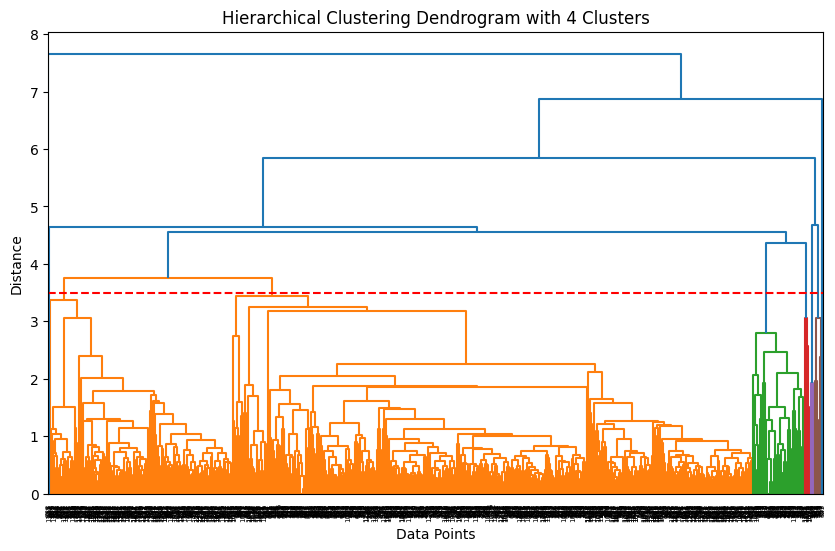

In [24]:
# Plot the dendrogram with color-coded clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=num_clusters)
plt.title('Hierarchical Clustering Dendrogram with {} Clusters'.format(num_clusters))
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Add color coding for clusters
color_threshold = num_clusters - 0.5
plt.axhline(y=color_threshold, color='r', linestyle='--')

plt.show()